In [32]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

In [2]:
print(tf.__version__)

2.15.0


In [3]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

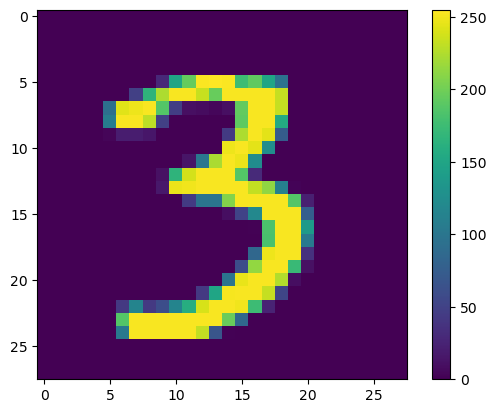

3


In [12]:
# visualisation de l'image a l'indice 10000
plt.figure()
plt.imshow(x_train[10000])
plt.colorbar()
plt.grid(False)
plt.show()
print(y_train[10000])

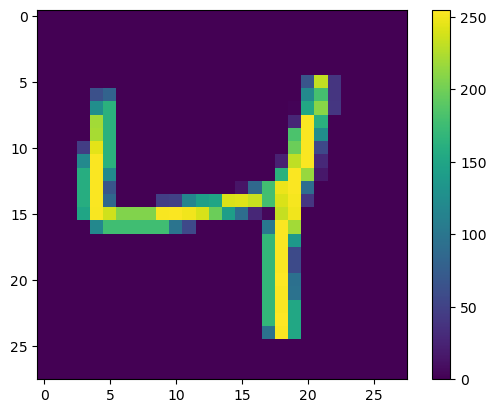

4


In [13]:
# visualisation de l'image a l'indice 2
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)
plt.show()
print(y_train[2])

In [14]:
# préparation des données

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range : 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [15]:
# construction du modéle
# activation ="softmax" : c'est une generalisation de la fonction sigmoide
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [16]:
# entraînons le modele

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",keras.metrics.Precision(), keras.metrics.Recall()])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15


422/422 [==============================] - 8s 17ms/step - loss: 0.3688 - accuracy: 0.8856 - precision: 0.9430 - recall: 0.8392 - val_loss: 0.0868 - val_accuracy: 0.9758 - val_precision: 0.9808 - val_recall: 0.9715
Epoch 2/15
422/422 [==============================] - 7s 17ms/step - loss: 0.1199 - accuracy: 0.9634 - precision: 0.9695 - recall: 0.9576 - val_loss: 0.0579 - val_accuracy: 0.9837 - val_precision: 0.9864 - val_recall: 0.9808
Epoch 3/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0913 - accuracy: 0.9719 - precision: 0.9762 - recall: 0.9682 - val_loss: 0.0462 - val_accuracy: 0.9878 - val_precision: 0.9906 - val_recall: 0.9865
Epoch 4/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0772 - accuracy: 0.9765 - precision: 0.9797 - recall: 0.9736 - val_loss: 0.0423 - val_accuracy: 0.9885 - val_precision: 0.9896 - val_recall: 0.9870
Epoch 5/15
422/422 [==============================] - 8s 18ms/step - loss: 0.0676 - accuracy: 0.9

In [27]:
# Évaluons le modèle sur l'ensemble de test
score = model.evaluate(x_test, y_test, verbose=0)

In [28]:
# Affichez les noms des métriques dans l'ordre
print(model.metrics_names)


['loss', 'accuracy', 'precision', 'recall']


In [33]:
# Affichons les résultats
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Test precision:", score[2])
print("Test recall:", score[3])

Test loss: 0.027900170534849167
Test accuracy: 0.9914000034332275
Test precision: 0.9921851754188538
Test recall: 0.9902999997138977


In [42]:
from sklearn.metrics import confusion_matrix
 
# Faisons des prédictions sur l'ensemble de test
predictions = model.predict(x_test)
 
# Convertissons les probabilités en prédictions binaires
y_pred = (predictions > 0.5).astype(int)
 
# Trouvons les indices des images mal classées
misclassified_indices = np.where(y_pred != y_test)[0]
 
# Créons une liste d'images mal classées avec leurs étiquettes réelles et prédites
misclassified_images = [(x_test[i], y_test[i], y_pred[i]) for i in misclassified_indices]

313/313 [==============================] - 2s 5ms/step


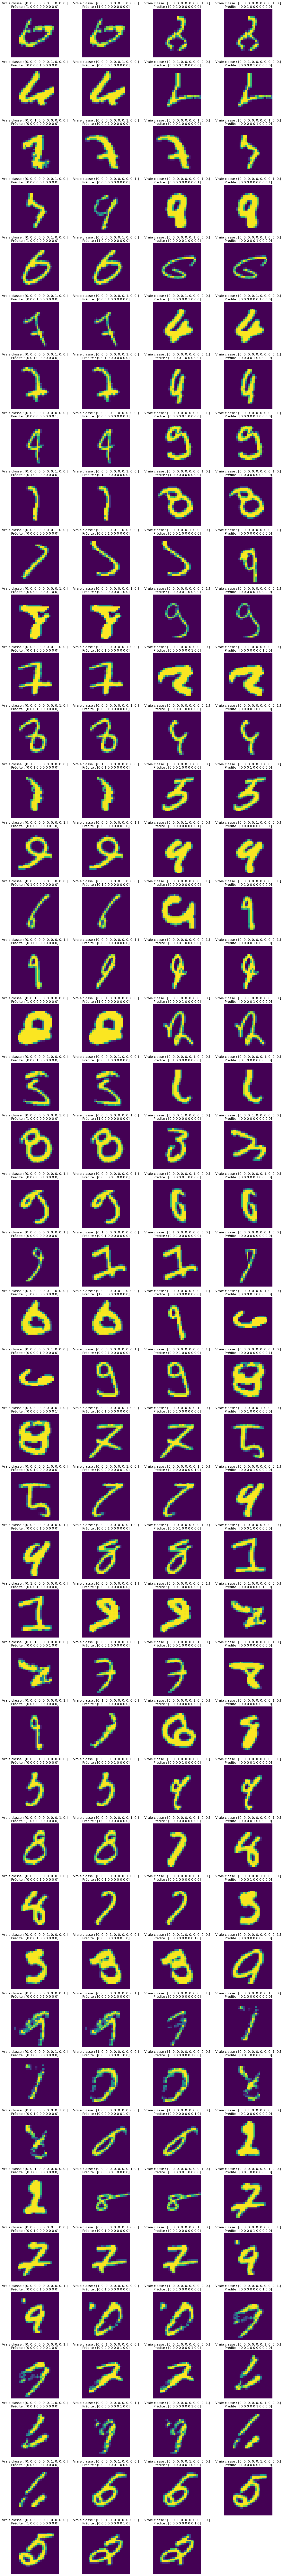

In [45]:
# Supposons que misclassified_images soit une liste d'images mal classées

# Définissons le nombre de colonnes pour l'affichage
num_columns = 4

# Calculons le nombre de lignes nécessaire
num_rows = int(np.ceil(len(misclassified_images) / num_columns))

# Ajustons la taille de la figure en fonction du nombre de lignes et de colonnes
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 3 * num_rows))

# Appliquons un aplatissement pour obtenir une liste d'axes à une dimension
axes = axes.flatten()

# Parcourons les images mal classées et affichez-les
for i, (image, true_label, predicted_label) in enumerate(misclassified_images):
    axes[i].imshow(image)
    axes[i].set_title(f'Vraie classe : {true_label}\nPrédite : {predicted_label}')
    axes[i].axis('off')

# Masquons les sous-plots inutilisés
for j in range(len(misclassified_images), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Identify an image that was wrongly classified by the model. Visualise the image. Analyse the image, and try to identify the reasons for the wrong prediction
Lors de l'analyse d'images mal classées, nous constatons  des caractéristiques visuelles ambiguës, telles que des chiffres mal écrits. Ces nuances peuvent induire en erreur le modèle de classification, De plus, il est crucial de détecter des similitudes visuelles avec d'autres images du jeu de données, et ces ressemblances peuvent être à l'origine de confusions. 

# Exercice 2 : Classification d'images avec des réseaux de neurones convolutifs(CNN) : analyse


Modifiez le taux d'apprentissage que vous utilisez pour la formation. Observez les impacts sur le temps d'entraînement, sur 
l'évolution des pertes au cours de l'entraînement et sur la précision du modèle sur l'ensemble de test.

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2975 - accuracy: 0.9126 - val_loss: 0.1383 - val_accuracy: 0.9577
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1425 - accuracy: 0.9576 - val_loss: 0.0986 - val_accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9667 - val_loss: 0.0942 - val_accuracy: 0.9712
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0875 - accuracy: 0.9730 - val_loss: 0.0775 - val_accuracy: 0.9749
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0758 - accuracy: 0.9763 - val_loss: 0.0760 - val_accuracy: 0.9765
313/313 - 0s - loss: 0.0760 - accuracy: 0.9765 - 425ms/epoch - 1ms/step
Test Accuracy: 0.9764999747276306
Test Loss: 0.076011523604393


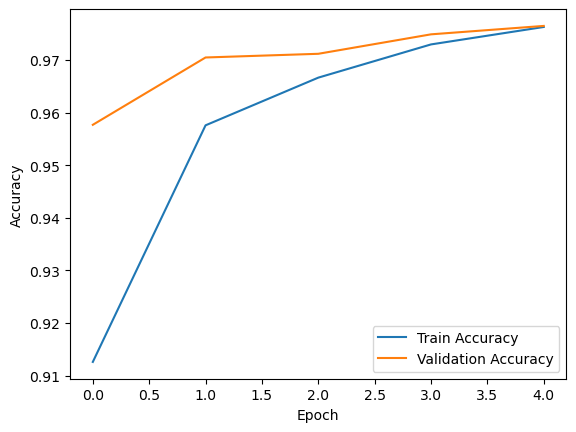

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


#Dans ce code, la ligne optimizer = keras.optimizers.Adam(learning_rate=new_learning_rate)
#est utilisée pour créer un nouvel optimiseur Adam avec le taux d'apprentissage spécifié.
#Ensuite, ce nouvel optimiseur est utilisé lors de la compilation du modèle avec model.compile.

#Remplaçons new_learning_rate par la valeur du taux d'apprentissage à tester. Examinons les résultats tels que la précision,
#la perte et l'évolution de l'entraînement pour observer les impacts du changement de taux d'apprentissage.


# Chargeons les données MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalisons les images et les étiquettes
x_train, x_test = x_train / 255.0, x_test / 255.0

# Construisons le modèle
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])
#Nos recherches :
#Le taux d'apprentissage (learning rate en anglais) est un hyperparamètre crucial dans
#le processus d'entraînement d'un modèle de machine learning. Il représente la taille
#des pas que l'algorithme de descente de gradient effectué lors de
#l'ajustement des poids du modèle afin de minimiser la fonction de perte.

#En d'autres termes, le taux d'apprentissage contrôle la magnitude des ajustements
#apportés aux poids du modèle lors de la mise à jour de ces poids pendant l'entraînement.
#Un taux d'apprentissage trop élevé peut entraîner des oscillations autour du minimum global,
#voire même une divergence du processus d'optimisation. En revanche, un taux d'apprentissage
#trop faible peut ralentir l'entraînement et potentiellement conduire à un minimum local suboptimal.



# Modifions le taux d'apprentissage
new_learning_rate = 0.001  # Remplaçons par le taux d'apprentissage souhaité
optimizer = keras.optimizers.Adam(learning_rate=new_learning_rate)

# Compilons le modèle avec le nouvel optimiseur
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entraînons le modèle
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Évaluons le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Affichons les résultats
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

# Visualisation de l'évolution de l'entraînement
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Test Accuracy for learning rate 0.1: 0.3425999879837036
Test Loss for learning rate 0.1: 2.116699457168579
Test Accuracy for learning rate 0.01: 0.9587000012397766
Test Loss for learning rate 0.01: 0.19162581861019135
Test Accuracy for learning rate 0.001: 0.975600004196167
Test Loss for learning rate 0.001: 0.07708922773599625
Test Accuracy for learning rate 0.0001: 0.9509000182151794
Test Loss for learning rate 0.0001: 0.1725495159626007


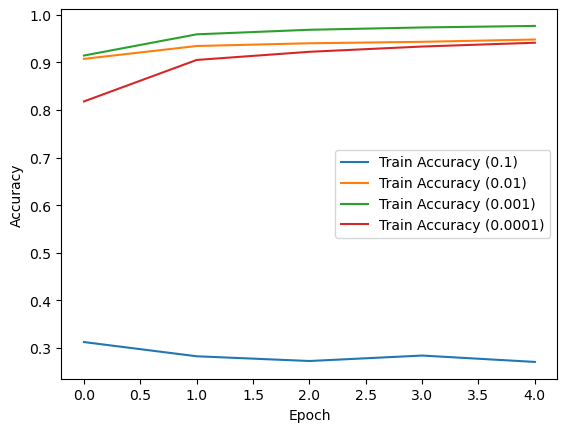

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Chargeons les données MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalisons les images et les étiquettes
x_train, x_test = x_train / 255.0, x_test / 255.0

# Définissons différentes valeurs de taux d'apprentissage à tester
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Initialisons une liste pour enregistrer les résultats
results = []

# Boucle sur les différentes valeurs de taux d'apprentissage
for new_learning_rate in learning_rates:
    # Construisons le modèle
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10)
    ])

    # Modifions le taux d'apprentissage
    optimizer = keras.optimizers.Adam(learning_rate=new_learning_rate)

    # Compilons le modèle avec le nouvel optimiseur
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Entraînons le modèle
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

    # Évaluons le modèle sur l'ensemble de test
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    # Enregistrons les résultats
    results.append({
        'learning_rate': new_learning_rate,
        'test_accuracy': test_acc,
        'test_loss': test_loss,
        'history': history
    })

# Affichons les résultats
for result in results:
    print(f'Test Accuracy for learning rate {result["learning_rate"]}: {result["test_accuracy"]}')
    print(f'Test Loss for learning rate {result["learning_rate"]}: {result["test_loss"]}')

    # Visualisation de l'évolution de l'entraînement
    plt.plot(result['history'].history['accuracy'], label=f'Train Accuracy ({result["learning_rate"]})')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Les résultats montrent que le taux d'apprentissage de 0.001 donne une meilleure performance en termes de précision sur l'ensemble de test par rapport aux autres taux d'apprentissage testés. Un taux d'apprentissage plus élevé par exemple 0.1 a conduit à une faible précision, tandis qu'un taux d'apprentissage plus faible comme 0.0001 a également entraîné une diminution de la performance.

Cependant, un taux d'apprentissage trop élevé peut conduire à une convergence rapide, mais il risque également de sauter le minimum global. D'un autre côté, un taux d'apprentissage trop faible peut entraîner une convergence lente et s'arrêter dans un minimum local.

Pour notre modèle, le taux d'apprentissage de 0.001 semble être un bon choix pour ce modèle et ce jeu de données particuliers.

 Ajoutez plus de couches convolutives. Ajoutez plus de calques Dropout. Ajoutez des couches plus entièrement connectées. 
Analyser systématiquement l’impact de ces actions

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_10 (Dropout)        (None, 1600)            

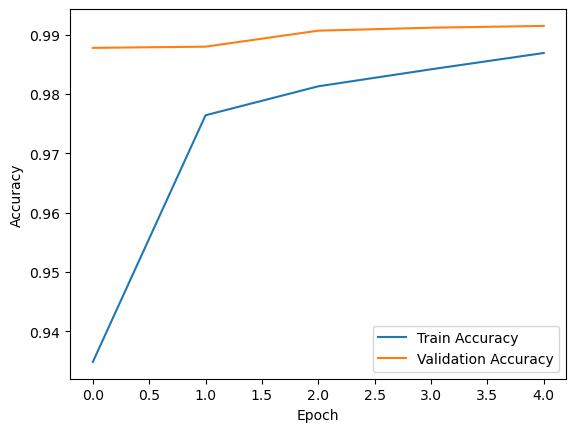

In [70]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Chargeons les données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisons les images et les étiquettes
x_train, x_test = x_train / 255.0, x_test / 255.0

# Construisons le modèle
model = models.Sequential()

# Ajouter plus de couches convolutives
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplatissons les résultats pour les couches entièrement connectées
model.add(layers.Flatten())

# Ajoutons des couches Dropout pour la régularisation
model.add(layers.Dropout(0.25))

# Ajoutons des couches entièrement connectées
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

# Affichons un résumé du modèle
model.summary()

# Compilons le modèle
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entraînons le modèle
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Évaluons le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Affichons les résultats
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

# Visualisation de l'évolution de l'entraînement
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Nos recherches :
#l'ajout de couches et de fonctionnalités peut augmenter la complexité du modèle,
#ce qui peut nécessiter des ajustements appropriés dans d'autres parties du modèle ou des paramètres d'entraînement.

 Modifier les paramètres convolutifs (foulée, rembourrage, activation). Documentez l’effet de ces modifications.


Epoch 1/5
1875/1875 [==============================] - 45s 23ms/step - loss: 0.1504 - accuracy: 0.9543 - val_loss: 0.0637 - val_accuracy: 0.9798
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0544 - val_accuracy: 0.9813
Epoch 3/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0417 - val_accuracy: 0.9864
Epoch 4/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0425 - val_accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0486 - val_accuracy: 0.9853
313/313 - 2s - loss: 0.0486 - accuracy: 0.9853 - 2s/epoch - 7ms/step
Test Accuracy: 0.9853000044822693
Test Loss: 0.04856150969862938


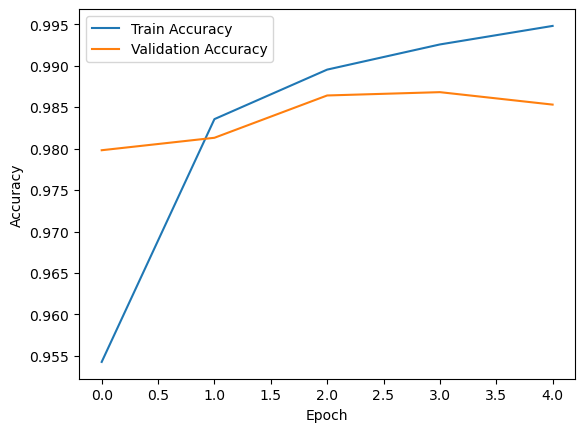

In [61]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Chargons les données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisons les images et les étiquettes
x_train, x_test = x_train / 255.0, x_test / 255.0

# Ajoutons une dimension pour représenter le canal (1 pour les images en niveaux de gris)
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

# Construisons le modèle
model = models.Sequential()

# Ajoutons une couche convolutive avec différentes configurations
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), strides=(1, 1), padding='valid'))
# Vous pouvez expérimenter en changeant les valeurs de strides et padding

# Ajoutons une couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Aplatissons les résultats pour les couches entièrement connectées
model.add(layers.Flatten())

# Ajoutons des couches entièrement connectées
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

# Compilons le modèle
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entraînons le modèle
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Évaluons le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Affichons les résultats
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

# Visualisation de l'évolution de l'entraînement
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Nos recherches :
#Dans ce code, la couche Conv2D est configurée avec différents paramètres :
#strides=(1, 1) : Cela détermine la taille du pas de la fenêtre de convolution lors du balayage
#de l'image. Vous pouvez expérimenter avec différentes valeurs.
#padding='valid' : Cela indique l'utilisation d'aucun rembourrage. Vous pouvez également utiliser
#'same' pour un rembourrage qui conserve la taille de l'image d'entrée.